<a href="https://colab.research.google.com/github/palVikram/Machine-Learning-using-Python/blob/master/Evaluation_of_object_detection_average_precision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Evaluating Object Detection Models
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]


The average precision (AP) is a way to summarize the precision-recall curve into a single value representing the average of all precisions. The AP is calculated according to the next equation. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. In other words, the AP is the weighted sum of precisions at each threshold where the weight is the increase in recall.

In [2]:
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]


In [3]:
import numpy

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]

threshold = 0.5
y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]
print(y_pred)

['positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score,recall_score
r = numpy.flip(confusion_matrix(y_true, y_pred))
print(r)

precision = precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(precision)

recall = recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(recall)

[[4 2]
 [1 3]]
0.8
0.6666666666666666


In [6]:
thresholds = numpy.arange(start=0.2, stop=0.7, step=0.05)
thresholds

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

In [7]:
### checking precision and recall across different prediction. 
import sklearn.metrics

def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [8]:
precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores,
                                             thresholds=thresholds)

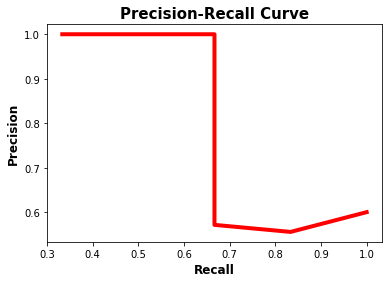

In [9]:
import matplotlib.pyplot as plt
plt.plot(recalls, precisions, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()

In [10]:
f1 = 2 * ((numpy.array(precisions) * numpy.array(recalls)) / (numpy.array(precisions) + numpy.array(recalls)))

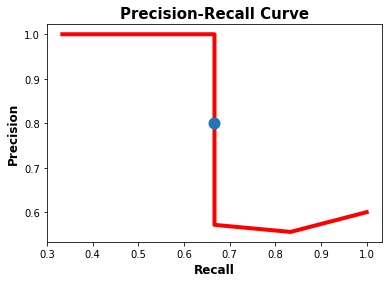

In [11]:
plt.plot(recalls, precisions, linewidth=4, color="red", zorder=0)
plt.scatter(recalls[5], precisions[5], zorder=1, linewidth=6)

plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()

In [16]:
precisions[:-1]

[0.6,
 0.5555555555555556,
 0.5555555555555556,
 0.5714285714285714,
 0.5714285714285714,
 0.8,
 0.8,
 1.0,
 1.0]

In [18]:
AP = np.sum((np.array(recalls[:-1]) - np.array(recalls[1:])) * precisions[:-1])
AP

0.5259259259259259

In [19]:
import numpy
import sklearn.metrics

def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive", "positive", "positive", "positive", "negative", "negative", "negative"]
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.8, 0.2, 0.3, 0.35]
thresholds=numpy.arange(start=0.2, stop=0.7, step=0.05)

precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores, 
                                             thresholds=thresholds)

precisions.append(1)
recalls.append(0)

precisions = numpy.array(precisions)
recalls = numpy.array(recalls)

AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

0.8898809523809523


Here is a summary of the steps to calculate the AP:

Generate the prediction scores using the model.

* Convert the prediction scores to class labels.
* Calculate the confusion matrix.
* Calculate the precision and recall metrics.
* Create the precision-recall curve.
* Measure the average precision.

